[ 1.84436539e+41  1.84432439e+41  1.84428417e+41 ... -1.44337670e+28
 -1.44337670e+28 -1.44337670e+28]


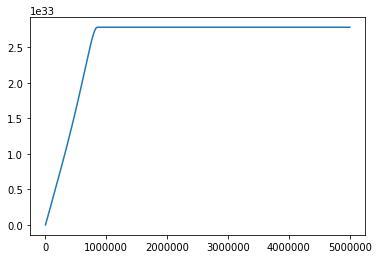

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff

a= 13.0
alpha = 0.49
b = 3.21
beta = 2.47
rho0 = 0.16
mn = 939

def E(rho):
    eos = a*(rho/rho0)**(alpha) + b*(rho/rho0)**beta
    return rho*(mn+eos)
def P(rho):
    return rho*(a*alpha*((rho/rho0)**alpha) + b*beta*((rho/rho0)**beta))

    
    
rho = np.arange(0.0001,0.5,0.00001)
listP = [i * 1.6022e33 for i in P(rho)] 
listrho = [i *1.7827e12 for i in E(rho)] 





from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
pi = 3.14
G = 6.67428e-8
c = 2.997924562e10

rho = listrho
P = listP

eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(10,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol#[:,1]

r = np.arange(10,5000000,1)

rhoc = 5e20
plt.plot(r,TOVsolve(rhoc)[:,1])
print(TOVsolve(rhoc)[:,0])


(5, 15)

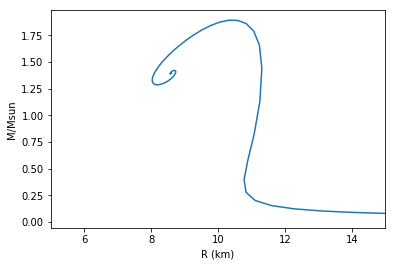

In [5]:
p = 100
#plot M_R curve
rhoc =np.logspace(12.8,21.5,p)
M = np.zeros_like(rhoc)
R = np.zeros_like(rhoc)
i = 0
for i in range(len(rhoc)) :
    P = TOVsolve(rhoc[i])[:,0]
    m = TOVsolve(rhoc[i])[:,1]
    location = np.where(P<1)[0][0]
    R[i] = r[location]
    M[i] = m[location]
    i = i + 1
    
Msun = 2e33
plt.plot(R/100000,M/Msun)
#plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
plt.xlim(5,15)

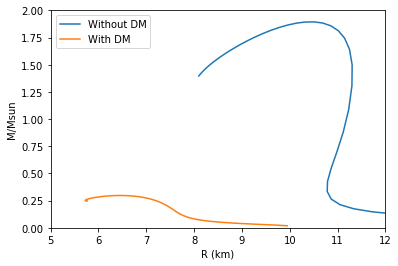

In [8]:
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff

p = 60
a= 13.0
alpha = 0.49
b = 3.21
beta = 2.47
rho0 = 0.16
#mn = 939
n0 = 0.16

def E(rho):
    eos = a*(rho/rho0)**(alpha) + b*(rho/rho0)**beta
    return rho*(mn+eos)
def P(rho):
    return rho*(a*alpha*((rho/rho0)**alpha) + b*beta*((rho/rho0)**beta))

    
    
rho = np.arange(0.0001,0.5,0.00001)
listP = [i * 1.6022e33 for i in P(rho)] 
listrho = [i *1.7827e12 for i in E(rho)] 





from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
pi = 3.14
G = 6.67428e-8
c = 2.997924562e10

rho = listrho
P = listP

eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(10,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol#[:,1]

r = np.arange(10,5000000,1)

#p = 1
#plot M_R curve
rhoc =np.logspace(13.0,16.5,p)
M = np.zeros_like(rhoc)
R = np.zeros_like(rhoc)
i = 0
for i in range(len(rhoc)) :
    P = TOVsolve(rhoc[i])[:,0]
    m = TOVsolve(rhoc[i])[:,1]
    location = np.where(P<1)[0][0]
    R[i] = r[location]
    M[i] = m[location]
    i = i + 1
    
Msun = 2e33
plt.plot(R/100000,M/Msun,label='Without DM')
#plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
plt.xlim(5,15)








from scipy.optimize import brentq

c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27

ma_in_Mev = 999999
ma = ma_in_Mev*(1e6/6.241e11/8.98740441e20)
mx_in_Mev = 937.9
mx = mx_in_Mev*(1e6/6.241e11/8.98740441e20)
g=1

def En(nb):
    eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3  
    return  (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
def Pn(nb):
    return nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2

listnb_fm =[]
listnb = []
listnx = []
listED = []
listPD = []
nb = 0.00001
while nb < 2.0:
    def F(nx):
        eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3
        E = (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
        P = nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2
        nb_cm = nb*1e39
        u = ((P/c**2+E)/nb_cm)*c**2
        sol = (  ((3*pi**2)**(2/3) *  (h*c) **2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) - u + (h**3/c)*((g**2)/(ma**2))*nx 
        return sol

    nx = scipy.optimize.brenth(F,0,1e45)
    listnb_fm.append(nb)
    listnb.append(nb*1e39)
    listnx.append(nx)#/(nx+nb))
    nb = nb + 0.00001

def ED(nx):
    k = (3*pi**2*h**3*nx)**(1/3)
    x = k/(mx*c)
    e0 = mx**4*c**5/(pi**2*h**3)
    ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2)\
        + (h**3/c)*((g**2)/(ma**2))*nx 
    ED = ((e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2)) -  np.arcsinh(x)) /c**2) + ((h**3/c)*g**2*nx**2/(2*ma**2)) /c**2
    return ED

def PD(nx):
    k = (3*pi**2*h**3*nx)**(1/3)
    x = k/(mx*c)
    e0 = mx**4*c**5/(pi**2*h**3)
    ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2)\
    + (h**3/c)*((g**2)/(ma**2))*nx 
    ED = ((e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2)) -  np.arcsinh(x)) + (h**3/c)*g**2*nx**2/(2*ma**2)) /c**2
    PD = (-ED + ux*nx)/c**2
    return PD

listnb_fm = np.asarray(listnb_fm) 
listnb = np.asarray(listnb) 
listnx = np.asarray(listnx)
listP = Pn(listnb_fm) + PD(listnx)
listrho = En(listnb_fm) + ED(listnx)
#plt.plot(listrho,listP)


from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
pi = 3.14
G = 6.67428e-8
c = 2.997924562e10

rho = listrho
P = listP

eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(10,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol#[:,1]

r = np.arange(10,5000000,1)

#rhoc = 5e13
#plt.plot(r,TOVsolve(rhoc))
#print(TOVsolve(rhoc)[:,0])

#plot M_R curve
rhoc =np.logspace(13.5,17.0,p)
M = np.zeros_like(rhoc)
R = np.zeros_like(rhoc)
i = 0
for i in range(len(rhoc)) :
    P = TOVsolve(rhoc[i])[:,0]
    m = TOVsolve(rhoc[i])[:,1]
    location = np.where(P<0)[0][0]
    R[i] = r[location]
    M[i] = m[location]
    i = i + 1
    
Msun = 2e33
plt.plot(R/100000,M/Msun,label='With DM')
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
plt.xlim(5,12)
plt.ylim(0,2)
plt.legend(loc='upper left')
#plt.savefig('filename4562156789.png',dpi=300)
plt.show()


No handles with labels found to put in legend.


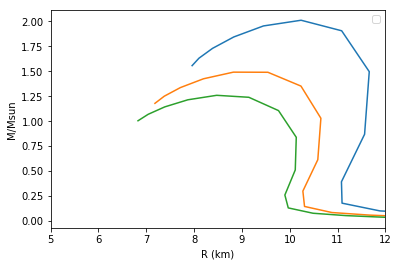

In [13]:
from scipy.optimize import brentq

c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27

ma = []
ma_in_Mev =[45 , 80 , 100]
j = 0
for j in range(len(ma_in_Mev)):
    ma.append( ma_in_Mev[j]*(1e6/6.241e11/8.98740441e20))
    mx_in_Mev = 937.9
    mx = mx_in_Mev*(1e6/6.241e11/8.98740441e20)
    g=1

    def En(nb):
        eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3  
        return  (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
    def Pn(nb):
        return nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2

    listnb_fm =[]
    listnb = []
    listnx = []
    listED = []
    listPD = []
    nb = 0.00001
    while nb < 2.0:
        def F(nx):
            eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3
            E = (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
            P = nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2
            nb_cm = nb*1e39
            u = ((P/c**2+E)/nb_cm)*c**2
            sol = (  ((3*pi**2)**(2/3) *  (h*c) **2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) - u + (h**3/c)*((g**2)/(ma[j]**2))*nx 
            return sol

        nx = scipy.optimize.brenth(F,0,1e45)
        listnb_fm.append(nb)
        listnb.append(nb*1e39)
        listnx.append(nx)
        nb = nb + 0.00001

    def ED(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(pi**2*h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        ED = ((e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2)) -  np.arcsinh(x)) /c**2) + ((h**3/c)*g**2*nx**2/(2*ma[j]**2)) /c**2
        return ED

    def PD(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(pi**2*h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2)\
        + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        ED = ((e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2)) -  np.arcsinh(x)) + (h**3/c)*g**2*nx**2/(2*ma[j]**2)) /c**2
        PD = (-ED + ux*nx)/c**2
        return PD

    listnb_fm = np.asarray(listnb_fm) 
    listnb = np.asarray(listnb) 
    listnx = np.asarray(listnx)
    listP = Pn(listnb_fm) + PD(listnx)
    listrho = En(listnb_fm) + ED(listnx)
    #plt.plot(listrho,listP)


    from scipy.integrate import odeint
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.interpolate import interp1d
    pi = 3.14
    G = 6.67428e-8
    c = 2.997924562e10

    rho = listrho
    P = listP

    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(10,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol#[:,1]

    r = np.arange(10,5000000,1)

    #rhoc = 5e13
    #plt.plot(r,TOVsolve(rhoc))
    #print(TOVsolve(rhoc)[:,0])

    #plot M_R curve
    p = 15
    rhoc =np.logspace(13.5,16.5,p)
    M = np.zeros_like(rhoc)
    R = np.zeros_like(rhoc)
    i = 0
    for i in range(len(rhoc)) :
        P = TOVsolve(rhoc[i])[:,0]
        m = TOVsolve(rhoc[i])[:,1]
        location = np.where(P<0)[0][0]
        R[i] = r[location]
        M[i] = m[location]
        i = i + 1
    
    Msun = 2e33
    plt.plot(R/100000,M/Msun)#label='With DM')
    plt.xlabel('R (km)')
    plt.ylabel('M/Msun')
    j = j + 1
plt.xlim(5,12)
#plt.ylim(0,2)
plt.legend(loc='upper right')
plt.savefig('filename4562156789.png',dpi=300)
plt.show()


0.019005365468831793
0.05807308807852927
0.10909520030290074
0.23696312497930969


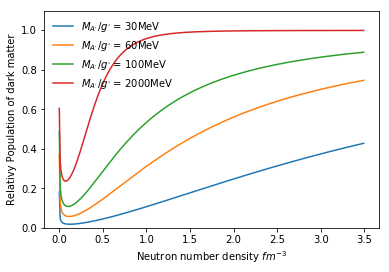

In [6]:
from scipy.optimize import brentq
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff

n0 = 0.16

c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
ma = []
ma_in_Mev = [30,60,100,2000]
Ma = '$M_{A^{,}} / g^{,}$ = '
MeV = 'MeV'
j = 0
for j in range(len(ma_in_Mev)):
    ma.append( ma_in_Mev[j]*(1e6/6.241e11/8.98740441e20))
    mx_in_Mev = 937.9
    mx = mx_in_Mev*(1e6/6.241e11/8.98740441e20)
    g=1
    listnb = []
    listnx = []
    listED = []
    listPD = []
    listratio = []
    listnbfm = []
    nb = 0.001
    while nb < 3.5:
        def F(nx):
            eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3
            E = (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
            P = nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2
            nb_cm = nb*1e39
            u = ((P/c**2+E)/nb_cm)*c**2
            sol = (  ((3*pi**2)**(2/3) *  (h*c) **2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) - u + (h**3/c)*((g**2)/(ma[j]**2))*nx 
            return sol

        nx = scipy.optimize.brenth(F,0,1e45)
        listnbfm.append(nb)
        listratio.append(nx/(nb*1e39+nx))
        listnb.append(nb*1e39)
        listnx.append(nx)
        nb = nb + 0.01
#plt.plot(listnb,listnx)
    #plt.plot(listnbfm,listratio,label = f'{Ma}{ma_in_Mev[j]} {MeV}') 
    plt.plot(listnbfm,listratio,label = f'{Ma}{ma_in_Mev[j]}{MeV}') 
    print(min(listratio))
    j = j + 1
plt.legend(loc='upper left')
plt.legend(frameon=False)
plt.ylim(0,1.1)
plt.xlabel('Neutron number density $fm^{-3}$')
plt.ylabel('Relativy Population of dark matter')
plt.savefig('DM Relativy Population.png',dpi=300)



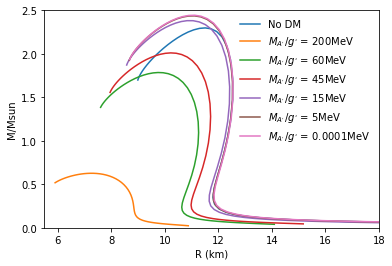

In [67]:
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff

p = 60
a= 13.4
alpha = 0.514
b = 5.62
beta = 2.436
rho0 = 0.16
mn = 939
n0= 0.16



from scipy.optimize import brentq

c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27

ma = []
ma_in_Mev =[200, 60 , 45 , 15 , 5 ,0.0001]
Ma = '$M_{A^{,}} / g^{,}$ = '
MeV = 'MeV'
j = 0
for j in range(len(ma_in_Mev)):
    ma.append( ma_in_Mev[j]*(1e6/6.241e11/8.98740441e20))
    mx_in_Mev = 937.9
    mx = mx_in_Mev*(1e6/6.241e11/8.98740441e20)
    g=1

    def En(nb):
        eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3  
        return  (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
    def Pn(nb):
        return nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2

    listnb_fm =[]
    listnb = []
    listnx = []
    listED = []
    listPD = []
    nb = 0.00001
    while nb < 2.0:
        def F(nx):
            eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3
            E = (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
            P = nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2
            nb_cm = nb*1e39
            u = ((P/c**2+E)/nb_cm)*c**2
            sol = (  ((3*pi**2)**(2/3) *  (h*c) **2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) - u + (h**3/c)*((g**2)/(ma[j]**2))*nx 
            return sol

        nx = scipy.optimize.brenth(F,0,1e45)
        listnb_fm.append(nb)
        listnb.append(nb*1e39)
        listnx.append(nx)#/(nx+nb))
        nb = nb + 0.00001

    def ED(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(pi**2*h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        ED = ((e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2)) -  np.arcsinh(x)) /c**2) + ((h**3/c)*g**2*nx**2/(2*ma[j]**2)) /c**2
        return ED

    def PD(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(pi**2*h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2)\
        + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        ED = ((e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2)) -  np.arcsinh(x)) + (h**3/c)*g**2*nx**2/(2*ma[j]**2)) /c**2
        PD = (-ED + ux*nx)/c**2
        return PD

    listnb_fm = np.asarray(listnb_fm) 
    listnb = np.asarray(listnb) 
    listnx = np.asarray(listnx)
    listP = Pn(listnb_fm) + PD(listnx)
    listrho = En(listnb_fm) + ED(listnx)
    #plt.plot(listrho,listP)


    from scipy.integrate import odeint
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.interpolate import interp1d
    pi = 3.14
    G = 6.67428e-8
    c = 2.997924562e10

    rho = listrho
    P = listP

    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(10,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol#[:,1]

    r = np.arange(10,5000000,1)

    #rhoc = 5e13
    #plt.plot(r,TOVsolve(rhoc))
    #print(TOVsolve(rhoc)[:,0])

    #plot M_R curve
    #p = 1
    rhoc =np.logspace(13.5,16.5,p)
    M = np.zeros_like(rhoc)
    R = np.zeros_like(rhoc)
    i = 0
    for i in range(len(rhoc)) :
        P = TOVsolve(rhoc[i])[:,0]
        m = TOVsolve(rhoc[i])[:,1]
        location = np.where(P<0)[0][0]
        R[i] = r[location]
        M[i] = m[location]
        i = i + 1
    
    Msun = 2e33
    plt.plot(R/100000,M/Msun,label=f'{Ma}{ma_in_Mev[j]}{MeV}')
    plt.xlabel('R (km)')
    plt.ylabel('M/Msun')
    j = j + 1
    
plt.ylim(0,2.5)
plt.xlim(5.5,18)
plt.legend(loc='upper right')
plt.legend(frameon=False)
#plt.savefig('filename4562156789.png',dpi=300)
plt.show()


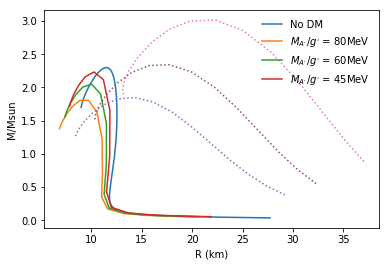

In [28]:
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff

p = 150
a= 13.4
alpha = 0.514
b = 5.62
beta = 2.436
rho0 = 0.16
mn = 939
n0= 0.16

def E(rho):
    eos = a*(rho/rho0)**(alpha) + b*(rho/rho0)**beta
    return rho*(mn+eos)
def P(rho):
    return rho*(a*alpha*((rho/rho0)**alpha) + b*beta*((rho/rho0)**beta))

    
    
rho = np.arange(0.0001,0.5,0.000001)
listP = [i * 1.6022e33 for i in P(rho)] 
listrho = [i *1.7827e12 for i in E(rho)] 





from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
pi = 3.14
G = 6.67428e-8
c = 2.997924562e10

rho = listrho
P = listP

eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(10,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol#[:,1]

r = np.arange(10,5000000,1)

#p = 1
#plot M_R curve
rhoc =np.logspace(12.8,16.5,p)
M = np.zeros_like(rhoc)
R = np.zeros_like(rhoc)
i = 0
for i in range(len(rhoc)) :
    P = TOVsolve(rhoc[i])[:,0]
    m = TOVsolve(rhoc[i])[:,1]
    location = np.where(P<1)[0][0]
    R[i] = r[location]
    M[i] = m[location]
    i = i + 1
    
Msun = 2e33
plt.plot(R/100000,M/Msun,label='No DM')
#plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
######################################



from scipy.optimize import brentq

p = 15
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27

ma = []
ma_in_Mev =[80, 60,45 ]
Ma = '$M_{A^{,}} / g^{,}$ = '
MeV = 'MeV'
j = 0
for j in range(len(ma_in_Mev)):
    ma.append( ma_in_Mev[j]*(1e6/6.241e11/8.98740441e20))
    mx_in_Mev = 937.9
    mx = mx_in_Mev*(1e6/6.241e11/8.98740441e20)
    g=1

    def En(nb):
        eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3  
        return  (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
    def Pn(nb):
        return nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2

    listnb_fm =[]
    listnb = []
    listnx = []
    listED = []
    listPD = []
    nb = 0.00001
    while nb < 2.0:
        def F(nx):
            eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3
            E = (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
            P = nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2
            nb_cm = nb*1e39
            u = ((P/c**2+E)/nb_cm)*c**2
            sol = (  ((3*pi**2)**(2/3) *  (h*c) **2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) - u + (h**3/c)*((g**2)/(ma[j]**2))*nx 
            return sol

        nx = scipy.optimize.brenth(F,0,1e45)
        listnb_fm.append(nb)
        listnb.append(nb*1e39)
        listnx.append(nx)#/(nx+nb))
        nb = nb + 0.00001

    def ED(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        ED = (e0) *( (1/(8*pi**2)) * ((2*x**3 + x) * (1 + x**2)**(1/2))   -  (1/(8*pi**2)) * np.arcsinh(x)\
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6      )/c**2
        return ED

    def PD(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2)\
        + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        
        PD = (e0) *( (1/(24*pi**2)) *((2*x**3 - 3*x) * (1 + x**2)**(1/2)) + 3*(1/(24*pi**2)) *np.arcsinh(x) 
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6     )
        return PD

    listnb_fm = np.asarray(listnb_fm) 
    listnb = np.asarray(listnb) 
    listnx = np.asarray(listnx)
    listP = Pn(listnb_fm) + PD(listnx)
    listrho = En(listnb_fm) + ED(listnx)
    #plt.plot(listrho,listP)


    from scipy.integrate import odeint
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.interpolate import interp1d
    pi = 3.14
    G = 6.67428e-8
    c = 2.997924562e10

    rho = listrho
    P = listP

    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(10,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol#[:,1]

    r = np.arange(10,5000000,1)

    #rhoc = 5e13
    #plt.plot(r,TOVsolve(rhoc))
    #print(TOVsolve(rhoc)[:,0])

    #plot M_R curve
    #p = 1
    rhoc =np.logspace(13.5,16.5,p)
    M = np.zeros_like(rhoc)
    R = np.zeros_like(rhoc)
    i = 0
    for i in range(len(rhoc)) :
        P = TOVsolve(rhoc[i])[:,0]
        m = TOVsolve(rhoc[i])[:,1]
        location = np.where(P<0)[0][0]
        R[i] = r[location]
        M[i] = m[location]
        i = i + 1
    
    Msun = 1.9e33
    plt.plot(R/100000,M/Msun,label=f'{Ma}{ma_in_Mev[j]}{MeV}')
    plt.xlabel('R (km)')
    plt.ylabel('M/Msun')
    j = j + 1

ma = []
ma_in_Mev =[80, 60,45 ]
Ma = '$M_{A^{,}} / g^{,}$ = '
MeV = 'MeV'
j = 0
for j in range(len(ma_in_Mev)):
    ma.append( ma_in_Mev[j]*(1e6/6.241e11/8.98740441e20))
    mx_in_Mev = 937.9
    mx = mx_in_Mev*(1e6/6.241e11/8.98740441e20)
    g=1

    def En(nb):
        eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3  
        return  (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
    def Pn(nb):
        return nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2

    listnb_fm =[]
    listnb = []
    listnx = []
    listED = []
    listPD = []
    nb = 0.00001
    while nb < 2.0:
        def F(nx):
            eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3
            E = (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
            P = nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2
            nb_cm = nb*1e39
            u = ((P/c**2+E)/nb_cm)*c**2
            sol = (  ((3*pi**2)**(2/3) *  (h*c) **2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) - u + (h**3/c)*((g**2)/(ma[j]**2))*nx 
            return sol

        nx = scipy.optimize.brenth(F,0,1e45)
        listnb_fm.append(nb)
        listnb.append(nb*1e39)
        listnx.append(nx)#/(nx+nb))
        nb = nb + 0.00001

    def ED(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        ED = (e0) *( (1/(8*pi**2)) * ((2*x**3 + x) * (1 + x**2)**(1/2))   -  (1/(8*pi**2)) * np.arcsinh(x)\
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6      )/c**2
        return ED

    def PD(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2)\
        + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        
        PD = (e0) *( (1/(24*pi**2)) *((2*x**3 - 3*x) * (1 + x**2)**(1/2)) + 3*(1/(24*pi**2)) *np.arcsinh(x) 
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6     )
        return PD

    listnb_fm = np.asarray(listnb_fm) 
    listnb = np.asarray(listnb) 
    listnx = np.asarray(listnx)
    listP = PD(listnx)
    listrho = ED(listnx)
    #plt.plot(listrho,listP)


    from scipy.integrate import odeint
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.interpolate import interp1d
    pi = 3.14
    G = 6.67428e-8
    c = 2.997924562e10

    rho = listrho
    P = listP

    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(10,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol#[:,1]

    r = np.arange(10,5000000,1)

    #rhoc = 5e13
    #plt.plot(r,TOVsolve(rhoc))
    #print(TOVsolve(rhoc)[:,0])

    #plot M_R curve
    #p = 1
    rhoc =np.logspace(13.5,16.5,p)
    M = np.zeros_like(rhoc)
    R = np.zeros_like(rhoc)
    i = 0
    for i in range(len(rhoc)) :
        P = TOVsolve(rhoc[i])[:,0]
        m = TOVsolve(rhoc[i])[:,1]
        location = np.where(P<0)[0][0]
        R[i] = r[location]
        M[i] = m[location]
        i = i + 1
    
    Msun = 1.9e33
    plt.plot(R/100000,M/Msun,linestyle = ':')
    plt.xlabel('R (km)')
    plt.ylabel('M/Msun')
    j = j + 1
#plt.ylim(0,2.8)
#plt.xlim(5.5,18)
plt.legend(loc='upper right')
plt.legend(frameon=False)
plt.savefig('filename4562156789.png',dpi=300)
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

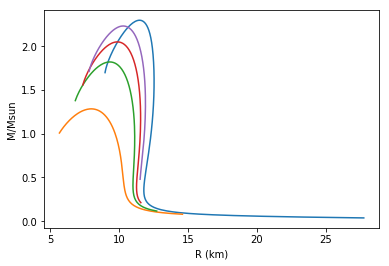

In [32]:
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff

p = 150
a= 13.4
alpha = 0.514
b = 5.62
beta = 2.436
rho0 = 0.16
mn = 939
n0= 0.16

def E(rho):
    eos = a*(rho/rho0)**(alpha) + b*(rho/rho0)**beta
    return rho*(mn+eos)
def P(rho):
    return rho*(a*alpha*((rho/rho0)**alpha) + b*beta*((rho/rho0)**beta))

    
    
rho = np.arange(0.0001,0.5,0.000001)
listP = [i * 1.6022e33 for i in P(rho)] 
listrho = [i *1.7827e12 for i in E(rho)] 





from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
pi = 3.14
G = 6.67428e-8
c = 2.997924562e10

rho = listrho
P = listP

eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(10,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol#[:,1]

r = np.arange(10,5000000,1)

#p = 1
#plot M_R curve
rhoc =np.logspace(12.8,16.5,p)
M = np.zeros_like(rhoc)
R = np.zeros_like(rhoc)
i = 0
for i in range(len(rhoc)) :
    P = TOVsolve(rhoc[i])[:,0]
    m = TOVsolve(rhoc[i])[:,1]
    location = np.where(P<1)[0][0]
    R[i] = r[location]
    M[i] = m[location]
    i = i + 1
    
Msun = 2e33
plt.plot(R/100000,M/Msun,label='No DM')
#plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
######################################



from scipy.optimize import brentq

c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27

ma = []
ma_in_Mev =[150 , 80, 60 , 45 , 15 ,1]
Ma = '$M_{A^{,}} / g^{,}$ = '
MeV = 'MeV'
j = 0
for j in range(len(ma_in_Mev)):
    ma.append( ma_in_Mev[j]*(1e6/6.241e11/8.98740441e20))
    mx_in_Mev = 937.9
    mx = mx_in_Mev*(1e6/6.241e11/8.98740441e20)
    g=1

    def En(nb):
        eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3  
        return  (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
    def Pn(nb):
        return nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2

    listnb_fm =[]
    listnb = []
    listnx = []
    listED = []
    listPD = []
    nb = 0.00001
    while nb < 2.0:
        def F(nx):
            eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3
            E = (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
            P = nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2
            nb_cm = nb*1e39
            u = ((P/c**2+E)/nb_cm)*c**2
            sol = (  ((3*pi**2)**(2/3) *  (h*c) **2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) - u + (h**3/c)*((g**2)/(ma[j]**2))*nx 
            return sol

        nx = scipy.optimize.brenth(F,0,1e45)
        listnb_fm.append(nb)
        listnb.append(nb*1e39)
        listnx.append(nx)#/(nx+nb))
        nb = nb + 0.00001

    def ED(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        ED = (e0) *( (1/(8*pi**2)) * ((2*x**3 + x) * (1 + x**2)**(1/2))   -  (1/(8*pi**2)) * np.arcsinh(x)\
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6      )/c**2
        return ED

    def PD(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2)\
        + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        
        PD = (e0) *( (1/(24*pi**2)) *((2*x**3 - 3*x) * (1 + x**2)**(1/2)) + 3*(1/(24*pi**2)) *np.arcsinh(x) 
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6     )
        return PD

    listnb_fm = np.asarray(listnb_fm) 
    listnb = np.asarray(listnb) 
    listnx = np.asarray(listnx)
    listP = Pn(listnb_fm) + PD(listnx)
    listrho = En(listnb_fm) + ED(listnx)
    #plt.plot(listrho,listP)


    from scipy.integrate import odeint
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.interpolate import interp1d
    pi = 3.14
    G = 6.67428e-8
    c = 2.997924562e10

    rho = listrho
    P = listP

    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(10,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol#[:,1]

    r = np.arange(10,5000000,1)

    #rhoc = 5e13
    #plt.plot(r,TOVsolve(rhoc))
    #print(TOVsolve(rhoc)[:,0])

    #plot M_R curve
    #p = 1
    rhoc =np.logspace(14+0.2*j,16.5,p)
    M = np.zeros_like(rhoc)
    R = np.zeros_like(rhoc)
    i = 0
    for i in range(len(rhoc)) :
        P = TOVsolve(rhoc[i])[:,0]
        m = TOVsolve(rhoc[i])[:,1]
        location = np.where(P<0)[0][0]
        R[i] = r[location]
        M[i] = m[location]
        i = i + 1
    
    Msun = 1.9e33
    plt.plot(R/100000,M/Msun,label=f'{Ma}{ma_in_Mev[j]}{MeV}')
    plt.xlabel('R (km)')
    plt.ylabel('M/Msun')
    j = j + 1


In [1]:
from scipy.optimize import brentq
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff

n0 = 0.16

c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
ma = []
ma_in_Mev = [30,60,100,1000]
Ma = '$M_{A^{,}} / g^{,}$ = '
MeV = 'MeV'
j = 0
for j in range(len(ma_in_Mev)):
    ma.append( ma_in_Mev[j]*(1e6/6.241e11/8.98740441e20))
    mx_in_Mev = 937.9
    mx = mx_in_Mev*(1e6/6.241e11/8.98740441e20)
    g=1
    listnb = []
    listnx = []
    listED = []
    listPD = []
    listratio = []
    listnbfm = []
    nb = 0.001
    while nb < 2.0:
        def F(nx):
            eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3
            E = (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
            P = nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2
            nb_cm = nb*1e39
            u = ((P/c**2+E)/nb_cm)*c**2
            sol = (  ((3*pi**2)**(2/3) *  (h*c) **2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) - u + (h**3/c)*((g**2)/(ma[j]**2))*nx 
            return sol

        nx = scipy.optimize.brenth(F,0,1e45)
        listnbfm.append(nb)
        listratio.append(nx/(nb*1e39+nx))
        listnb.append(nb*1e39)
        listnx.append(nx)
        nb = nb + 0.01
#plt.plot(listnb,listnx)
    #plt.plot(listnbfm,listratio,label = f'{Ma}{ma_in_Mev[j]} {MeV}') 
    plt.plot(listnbfm,listratio,label = f'{Ma}{ma_in_Mev[j]}{MeV}') 
    print(min(listratio))
    j = j + 1

plt.legend(loc='upper left')
plt.legend(frameon=False)
plt.ylim(0,1.0)
plt.xlabel('Neutron number density $fm^{-3}$')
plt.ylabel('Relativy Population of dark matter')
plt.savefig('filename4562156789.png',dpi=300)   

NameError: name 'a' is not defined

[ 1.43208668e+32  1.43208668e+32  1.43208668e+32 ... -5.41882253e+29
 -5.41882254e+29 -5.41882256e+29]
[1.00000000e+14 4.21696503e+14 1.77827941e+15 7.49894209e+15
 3.16227766e+16]


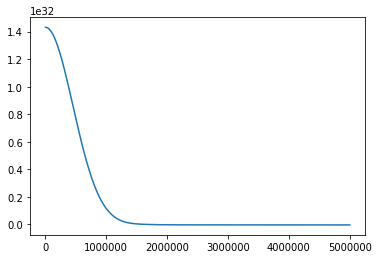

In [78]:
from scipy.optimize import brentq

c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27

ma = []
ma_in_Mev =[35]
Ma = '$M_{A^{,}} / g^{,}$ = '
MeV = 'MeV'
j = 0
for j in range(len(ma_in_Mev)):
    ma.append( ma_in_Mev[j]*(1e6/6.241e11/8.98740441e20))
    mx_in_Mev = 937.9
    mx = mx_in_Mev*(1e6/6.241e11/8.98740441e20)
    g=1

    def En(nb):
        eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3  
        return  (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
    def Pn(nb):
        return nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2

    listnb_fm =[]
    listnb = []
    listnx = []
    listED = []
    listPD = []
    nb = 0.001
    while nb < 2.0:
        def F(nx):
            eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3
            E = (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
            P = nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2
            nb_cm = nb*1e39
            u = ((P/c**2+E)/nb_cm)*c**2
            sol = (  ((3*pi**2)**(2/3) *  (h*c) **2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) - u + (h**3/c)*((g**2)/(ma[j]**2))*nx 
            return sol

        nx = scipy.optimize.brenth(F,0,1e45)
        listnb_fm.append(nb)
        listnb.append(nb*1e39)
        listnx.append(nx)#/(nx+nb))
        nb = nb + 0.00001

    def ED(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        ED = (e0) *( (1/(8*pi**2)) * ((2*x**3 + x) * (1 + x**2)**(1/2))   -  (1/(8*pi**2)) * np.arcsinh(x)\
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6      )/c**2
        return ED

    def PD(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2)\
        + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        
        PD = (e0) *( (1/(24*pi**2)) *((2*x**3 - 3*x) * (1 + x**2)**(1/2)) + 3*(1/(24*pi**2)) *np.arcsinh(x) 
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6     )
        return PD

    listnb_fm = np.asarray(listnb_fm) 
    listnb = np.asarray(listnb) 
    listnx = np.asarray(listnx)
    listP = Pn(listnb_fm) + PD(listnx)
    listrho = En(listnb_fm) + ED(listnx)
    #plt.plot(listrho,listP)


    from scipy.integrate import odeint
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.interpolate import interp1d
    pi = 3.14
    G = 6.67428e-8
    c = 2.997924562e10

    rho = listrho
    P = listP

    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(10,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol[:,0]
    r = np.arange(10,5000000,1)
    plt.plot(r,TOVsolve(5e13))
    print(TOVsolve(5e13))
    print(np.logspace(14,16.5,5))

1
5
15
40
60
100
Max mass : 0.7093625134824059
Max mass radius : [9.6749]


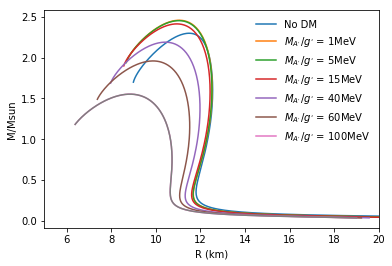

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff

po = 300
a= 13.4
alpha = 0.514
b = 5.62
beta = 2.436
rho0 = 0.16
mn = 939
n0= 0.16

def E(rho):
    eos = a*(rho/rho0)**(alpha) + b*(rho/rho0)**beta
    return rho*(mn+eos)
def P(rho):
    return rho*(a*alpha*((rho/rho0)**alpha) + b*beta*((rho/rho0)**beta))

    
    
rho = np.arange(0.0001,0.5,0.000001)
listP = [i * 1.6022e33 for i in P(rho)] 
listrho = [i *1.7827e12 for i in E(rho)] 





from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
pi = 3.14
G = 6.67428e-8
c = 2.997924562e10

rho = listrho
P = listP

eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(10,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol#[:,1]

r = np.arange(10,5000000,1)

#p = 1
#plot M_R curve
rhoc =np.logspace(12.8,16.5,po)
M = np.zeros_like(rhoc)
R = np.zeros_like(rhoc)
i = 0
for i in range(len(rhoc)) :
    P = TOVsolve(rhoc[i])[:,0]
    m = TOVsolve(rhoc[i])[:,1]
    location = np.where(P<1)[0][0]
    R[i] = r[location]
    M[i] = m[location]
    i = i + 1
    
Msun = 2e33
plt.plot(R/100000,M/Msun,label='No DM')
#plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
###############################################
from scipy.optimize import brentq
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27

ma = []
ma_in_Mev =[100,60,40,15,5,1] #25
ma_in_Mev =[1,5,15,40,60,100]
Ma = '$M_{A^{,}} / g^{,}$ = '
MeV = 'MeV'
j = 0
for j in range(len(ma_in_Mev)):
    ma.append( ma_in_Mev[j]*(1e6/6.241e11/8.98740441e20))
    mx_in_Mev = 937.9
    mx = mx_in_Mev*(1e6/6.241e11/8.98740441e20)
    g=1

    def En(nb):
        eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3  
        return  (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
    def Pn(nb):
        return nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2

    listnb_fm =[]
    listnb = []
    listnx = []
    listED = []
    listPD = []
    nb = 0.001
    while nb < 2.0:
        def F(nx):
            eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3
            E = (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
            P = nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2
            nb_cm = nb*1e39
            u = ((P/c**2+E)/nb_cm)*c**2
            sol = (  ((3*pi**2)**(2/3) *  (h*c) **2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) - u + (h**3/c)*((g**2)/(ma[j]**2))*nx 
            return sol

        nx = scipy.optimize.brenth(F,0,1e45)
        listnb_fm.append(nb)
        listnb.append(nb*1e39)
        listnx.append(nx)#/(nx+nb))
        nb = nb + 0.00001

    def ED(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        ED = (e0) *( (1/(8*pi**2)) * ((2*x**3 + x) * (1 + x**2)**(1/2))   -  (1/(8*pi**2)) * np.arcsinh(x)\
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6      )/c**2
        return ED

    def PD(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2)\
        + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        
        PD = (e0) *( (1/(24*pi**2)) *((2*x**3 - 3*x) * (1 + x**2)**(1/2)) + 3*(1/(24*pi**2)) *np.arcsinh(x) 
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6     )
        return PD

    listnb_fm = np.asarray(listnb_fm) 
    listnb = np.asarray(listnb) 
    listnx = np.asarray(listnx)
    listP = Pn(listnb_fm) + PD(listnx)
    listrho = En(listnb_fm) + ED(listnx)
    #plt.plot(listrho,listP)


    from scipy.integrate import odeint
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.interpolate import interp1d
    pi = 3.14
    G = 6.67428e-8
    c = 2.997924562e10

    rho = listrho
    P = listP

    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(10,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol#[:,1]

    r = np.arange(10,5000000,1)

    #rhoc = 5e13
    #plt.plot(r,TOVsolve(rhoc))
    #print(TOVsolve(rhoc)[:,0])

    #plot M_R curve
    #p = 1
    rhoc =np.logspace(13.0,16.5,po)
    M = np.zeros_like(rhoc)
    R = np.zeros_like(rhoc)
    i = 0
    for i in range(len(rhoc)) :
        P = TOVsolve(rhoc[i])[:,0]
        m = TOVsolve(rhoc[i])[:,1]
        location = np.where(P<0)[0][0]
        R[i] = r[location]
        M[i] = m[location]
        i = i + 1
    
    Msun = 1.98892e33
    plt.plot(R/100000,M/Msun,label=f'{Ma}{ma_in_Mev[j]}{MeV}')
    plt.xlabel('R (km)')
    plt.xlim(5,20)
    plt.ylabel('M/Msun')
    plt.legend(loc='upper right')
    plt.legend(frameon=False)
    print(ma_in_Mev[j])
    j = j + 1

###################################3    

Msun = 1.98892e33
print("Max mass :",M_max/Msun)
print("Max mass radius :" ,R_max/100000)
plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
plt.savefig('filename4562156789.png',dpi=300)   

Max mass : 0.7093625134824059
Max mass radius : [9.6749]
100
500
1000
10000
100000


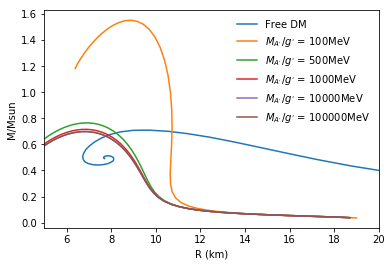

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d

from scipy.integrate import odeint
po = 50
a= 13.4
alpha = 0.514
b = 5.62
beta = 2.436
rho0 = 0.16
mn = 939
n0= 0.16
m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(pi**2*h**3)

def e(x) :
    return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x)) /c**2
    #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.log( x + ((1 + x**2)**(1/2))    )) /c**2
def p(x):
    return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)    )
     #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))
k = np.logspace(-15,-13.4,10000)
x = k/(m*c)

rho = e(x)
P = p(x)
eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(1,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol[:,1] 
'''
r = np.arange(1,5000000,1)
rhoc = 5e15
plt.plot(r,TOVsolve(rhoc))
'''
#plot M_R curve
r = np.arange(1,5000000,1)
rhocD = np.logspace(14,21,po)#up22
M = np.zeros_like(rhocD)
R = np.zeros_like(rhocD)
location = np.zeros_like(rhocD)
i = 0
for i in range(len(rhocD)) :
    diff = np.diff(TOVsolve(rhocD[i])) / np.diff(r)
    lo = np.where (diff < 1)[0]
    lo1 = lo[0]
    M[i] = TOVsolve(rhocD[i])[lo1]
    R[i] = r[lo1]
    i = i + 1
    
# max M and R
M_max = max(M)
location1 = np.where(M == M_max)
R_max = R[location1]

Msun = 1.98892e33
print("Max mass :",M_max/Msun)
print("Max mass radius :" ,R_max/100000)
plt.plot(R/100000,M/Msun,label='Free DM')
plt.xlabel('R (km)')
plt.ylabel('M/Msun')



from scipy.optimize import brentq
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27

ma = []
ma_in_Mev =[100,500,1000,10000,100000] #25
Ma = '$M_{A^{,}} / g^{,}$ = '
MeV = 'MeV'
j = 0
for j in range(len(ma_in_Mev)):
    ma.append( ma_in_Mev[j]*(1e6/6.241e11/8.98740441e20))
    mx_in_Mev = 937.9
    mx = mx_in_Mev*(1e6/6.241e11/8.98740441e20)
    g=1

    def En(nb):
        eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3  
        return  (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
    def Pn(nb):
        return nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2

    listnb_fm =[]
    listnb = []
    listnx = []
    listED = []
    listPD = []
    nb = 0.001
    while nb < 2.0:
        def F(nx):
            eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3
            E = (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
            P = nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2
            nb_cm = nb*1e39
            u = ((P/c**2+E)/nb_cm)*c**2
            sol = (  ((3*pi**2)**(2/3) *  (h*c) **2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) - u + (h**3/c)*((g**2)/(ma[j]**2))*nx 
            return sol

        nx = scipy.optimize.brenth(F,0,1e45)
        listnb_fm.append(nb)
        listnb.append(nb*1e39)
        listnx.append(nx)#/(nx+nb))
        nb = nb + 0.00001

    def ED(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        ED = (e0) *( (1/(8*pi**2)) * ((2*x**3 + x) * (1 + x**2)**(1/2))   -  (1/(8*pi**2)) * np.arcsinh(x)\
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6      )/c**2
        return ED

    def PD(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2)\
        + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        
        PD = (e0) *( (1/(24*pi**2)) *((2*x**3 - 3*x) * (1 + x**2)**(1/2)) + 3*(1/(24*pi**2)) *np.arcsinh(x) 
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6     )
        return PD

    listnb_fm = np.asarray(listnb_fm) 
    listnb = np.asarray(listnb) 
    listnx = np.asarray(listnx)
    listP = Pn(listnb_fm) + PD(listnx)
    listrho = En(listnb_fm) + ED(listnx)
    #plt.plot(listrho,listP)


    from scipy.integrate import odeint
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.interpolate import interp1d
    pi = 3.14
    G = 6.67428e-8
    c = 2.997924562e10

    rho = listrho
    P = listP

    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(10,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol#[:,1]

    r = np.arange(10,5000000,1)

    #rhoc = 5e13
    #plt.plot(r,TOVsolve(rhoc))
    #print(TOVsolve(rhoc)[:,0])

    #plot M_R curve
    #p = 1
    rhoc =np.logspace(13.0,16.5,po)
    M = np.zeros_like(rhoc)
    R = np.zeros_like(rhoc)
    i = 0
    for i in range(len(rhoc)) :
        P = TOVsolve(rhoc[i])[:,0]
        m = TOVsolve(rhoc[i])[:,1]
        location = np.where(P<0)[0][0]
        R[i] = r[location]
        M[i] = m[location]
        i = i + 1
    
    Msun = 1.98892e33
    plt.plot(R/100000,M/Msun,label=f'{Ma}{ma_in_Mev[j]}{MeV}')
    plt.xlabel('R (km)')
    plt.xlim(5,20)
    plt.ylabel('M/Msun')
    plt.legend(loc='upper right')
    plt.legend(frameon=False)
    print(ma_in_Mev[j])
    j = j + 1

###################################3    

    

plt.savefig('filename56789.png',dpi=300)   

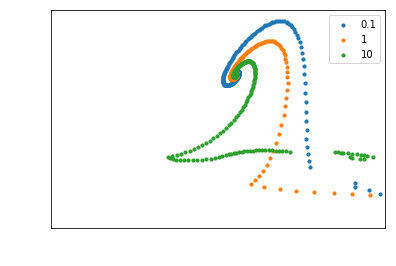

In [7]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.integrate import odeint

a= 13.0
alpha = 0.49
b = 3.21
beta = 2.47
rho0 = 0.16
mn = 939

def E(rho):
    eos = a*(rho/rho0)**(alpha) + b*(rho/rho0)**beta
    return rho*(mn+eos)
def P(rho):
    return rho*(a*alpha*((rho/rho0)**alpha) + b*beta*((rho/rho0)**beta))

    
    
rho = np.arange(0.0001,0.5,0.00001)
listP = [i * 1.6022e33 for i in P(rho)] 
listrho = [i *1.7827e12 for i in E(rho)] 





from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
pi = 3.14
G = 6.67428e-8
c = 2.997924562e10

rho = listrho
P = listP
eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")



m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(pi**2*h**3)

def e(x) :
    return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x)) /c**2
    #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.log( x + ((1 + x**2)**(1/2))    )) /c**2
def p(x):
    return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)    )
     #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))
k = np.logspace(-15,-13.4,10000)
x = k/(m*c)

rho = e(x)
P = p(x)
eos1 =  interp1d(rho,P,fill_value="extrapolate")
inveos1 =  interp1d(P,rho,fill_value="extrapolate")

pi = 3.14
G = 6.674e-8
c = 3e10

    
def TOV(y, r) :   
    P, m   = y[0], y[1] 
    P1, m1 =  y[2] , y[3]
    rho = inveos
    rho1 = inveos1                      
    
    dPdr =  ( (-G*(m+m1)*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) \
    * (1+ ( (4*pi*r**3*(P+P1)) /((m+m1)*c**2) )) *( (1- ((2*G*(m+m1))/(r*c**2))  )**(-1) )          
    dPdr1 =  ( (-G*(m+m1)*rho1(P1))/(r**2) ) * (1+( P1/(rho1(P1)*c**2) )) \
    * (1+ ( (4*pi*r**3*(P+P1)) /((m+m1)*c**2) )) *( (1- ((2*G*(m+m1))/(r*c**2))  )**(-1) )          

    dmdr = 4.0*pi*r**2*rho(P)
    dmdr1 = 4.0*pi*r**2*rho1(P1)
    return np.array([dPdr, dmdr , dPdr1 , dmdr1 ])

def TOVsolve(rhoc,rhoc1):
    r = np.arange(10,10000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    m1 = 4.0*pi*r[0]**3*rhoc1       
    P = eos(rhoc)
    P1 = eos1(rhoc1)
    psol = odeint(TOV,[P,m ,P1,m1],r)
    
    P =  psol[:,0]
    m = psol[:,1]
    P1 =  psol[:,2]
    m1 = psol[:,3]
    Ptotal = P+P1
    M = m+m1
    
    return M , Ptotal

r = np.arange(10,10000000,1)

ratio = [0.1,1,10 ]
j = 0
for j in range(len(ratio)):
    rhoc =np.logspace(14,20,250)
    rhoc1 = np.zeros_like(rhoc)
    M = np.zeros_like(rhoc)
    R = np.zeros_like(rhoc)
    i = 0
    for i in range(len(rhoc)) :
        rhoc1[i] = rhoc[i]*ratio[j]
        diff = np.diff(TOVsolve(rhoc[i],rhoc1[i])[0]) / np.diff(r)
        lo = np.where (diff < 1)[0]
        location = lo[0]
        M[i] = TOVsolve(rhoc[i],rhoc1[i])[0][location]
        R[i] = r[location]
        i = i + 1
    Msun = 1.98892e33
    plt.scatter(R/100000,M/Msun,label=ratio[j],s=10)
    plt.xlabel('R (km)',color='white')
    plt.ylabel('M/Msun',color='white')
    plt.legend(loc='upper right')
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    plt.xlim(1,15)
    #plt.show()
    j = j +1


100
500
1000
10000
100000


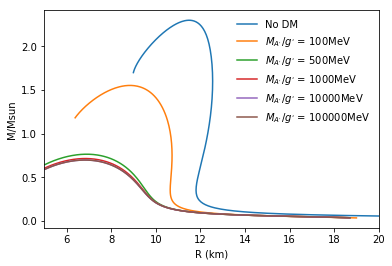

In [5]:
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff

po = 300
a= 13.4
alpha = 0.514
b = 5.62
beta = 2.436
rho0 = 0.16
mn = 939
n0= 0.16

def E(rho):
    eos = a*(rho/rho0)**(alpha) + b*(rho/rho0)**beta
    return rho*(mn+eos)
def P(rho):
    return rho*(a*alpha*((rho/rho0)**alpha) + b*beta*((rho/rho0)**beta))

    
    
rho = np.arange(0.0001,0.5,0.000001)
listP = [i * 1.6022e33 for i in P(rho)] 
listrho = [i *1.7827e12 for i in E(rho)] 





from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
pi = 3.14
G = 6.67428e-8
c = 2.997924562e10

rho = listrho
P = listP

eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(10,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol#[:,1]

r = np.arange(10,5000000,1)

#p = 1
#plot M_R curve
rhoc =np.logspace(12.8,16.5,po)
M = np.zeros_like(rhoc)
R = np.zeros_like(rhoc)
i = 0
for i in range(len(rhoc)) :
    P = TOVsolve(rhoc[i])[:,0]
    m = TOVsolve(rhoc[i])[:,1]
    location = np.where(P<1)[0][0]
    R[i] = r[location]
    M[i] = m[location]
    i = i + 1
    
Msun = 2e33
plt.plot(R/100000,M/Msun,label='No DM')
#plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')


ma = []
ma_in_Mev =[100,500,1000,10000,100000] #25
Ma = '$M_{A^{,}} / g^{,}$ = '
MeV = 'MeV'
j = 0
for j in range(len(ma_in_Mev)):
    ma.append( ma_in_Mev[j]*(1e6/6.241e11/8.98740441e20))
    mx_in_Mev = 937.9
    mx = mx_in_Mev*(1e6/6.241e11/8.98740441e20)
    g=1

    def En(nb):
        eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3  
        return  (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
    def Pn(nb):
        return nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2

    listnb_fm =[]
    listnb = []
    listnx = []
    listED = []
    listPD = []
    nb = 0.001
    while nb < 2.0:
        def F(nx):
            eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3
            E = (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
            P = nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2
            nb_cm = nb*1e39
            u = ((P/c**2+E)/nb_cm)*c**2
            sol = (  ((3*pi**2)**(2/3) *  (h*c) **2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) - u + (h**3/c)*((g**2)/(ma[j]**2))*nx 
            return sol

        nx = scipy.optimize.brenth(F,0,1e45)
        listnb_fm.append(nb)
        listnb.append(nb*1e39)
        listnx.append(nx)#/(nx+nb))
        nb = nb + 0.00001

    def ED(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        ED = (e0) *( (1/(8*pi**2)) * ((2*x**3 + x) * (1 + x**2)**(1/2))   -  (1/(8*pi**2)) * np.arcsinh(x)\
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6      )/c**2
        return ED

    def PD(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2)\
        + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        
        PD = (e0) *( (1/(24*pi**2)) *((2*x**3 - 3*x) * (1 + x**2)**(1/2)) + 3*(1/(24*pi**2)) *np.arcsinh(x) 
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6     )
        return PD

    listnb_fm = np.asarray(listnb_fm) 
    listnb = np.asarray(listnb) 
    listnx = np.asarray(listnx)
    listP = Pn(listnb_fm) + PD(listnx)
    listrho = En(listnb_fm) + ED(listnx)
    #plt.plot(listrho,listP)


    from scipy.integrate import odeint
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.interpolate import interp1d
    pi = 3.14
    G = 6.67428e-8
    c = 2.997924562e10

    rho = listrho
    P = listP

    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(10,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol#[:,1]

    r = np.arange(10,5000000,1)

    #rhoc = 5e13
    #plt.plot(r,TOVsolve(rhoc))
    #print(TOVsolve(rhoc)[:,0])

    #plot M_R curve
    #p = 1
    rhoc =np.logspace(13.0,16.5,po)
    M = np.zeros_like(rhoc)
    R = np.zeros_like(rhoc)
    i = 0
    for i in range(len(rhoc)) :
        P = TOVsolve(rhoc[i])[:,0]
        m = TOVsolve(rhoc[i])[:,1]
        location = np.where(P<0)[0][0]
        R[i] = r[location]
        M[i] = m[location]
        i = i + 1
    
    Msun = 1.98892e33
    plt.plot(R/100000,M/Msun,label=f'{Ma}{ma_in_Mev[j]}{MeV}')
    plt.xlabel('R (km)')
    plt.xlim(5,20)
    plt.ylabel('M/Msun')
    plt.legend(loc='upper right')
    plt.legend(frameon=False)
    print(ma_in_Mev[j])
    j = j + 1
plt.savefig('filename56789.png',dpi=300)   

[0.01668662 0.01706263 0.01741467 ... 0.64062254 0.64063529 0.64064805]


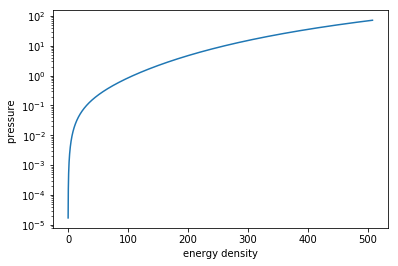

In [70]:
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff

a= 13.0
alpha = 0.49
b = 3.21
beta = 2.47
rho0 = 0.16
mn = 939

def E(rho):
    eos = a*(rho/rho0)**(alpha) + b*(rho/rho0)**beta
    return rho*(mn+eos)
def P(rho):
    return rho*(a*alpha*((rho/rho0)**alpha) + b*beta*((rho/rho0)**beta))

rho = np.arange(0.0001,0.5,0.00001)

listP = [i * 1 for i in P(rho)] 
listrho = [i *1 for i in E(rho)] 


plt.plot(listrho,listP)
plt.yscale('log')
from numpy import diff
dydx = (diff(listP)/diff(listrho))**(1/2)
z= np.arange(0,1000)
plt.xlabel('energy density')
plt.ylabel('pressure ' )
print(dydx)

In [74]:
import pandas as pd
percentile_list = pd.DataFrame(list(zip(listrho, listP,dydx )),
              columns=['energy density','pressure','Sound speed'])
percentile_list 
#percentile_list .to_csv("submit con.csv",index=False)

,energy density,pressure,Sound speed
0,0.093935,0.000017,0.016687
1,0.103330,0.000020,0.017063
2,0.112726,0.000022,0.017415
3,0.122122,0.000025,0.017746
4,0.131518,0.000028,0.018059
5,0.140914,0.000031,0.018357
6,0.150310,0.000035,0.018640
7,0.159707,0.000038,0.018910
8,0.169104,0.000041,0.019169
9,0.178501,0.000045,0.019418


60
1.9998636809192623
20
2.3803227582858955
15
2.4122413302987296
10
2.4362815227966776
5
2.451288261927138
1
2.4562013454249727
0.1
2.456405576738195


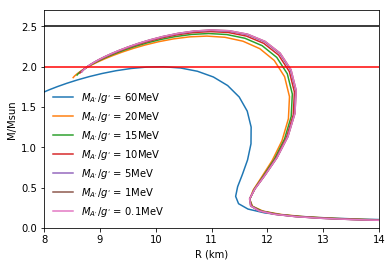

In [4]:
from scipy.optimize import brentq
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff

po = 50
a = 13.4
b = 5.62
alpha = 0.514
beta = 2.436
rho0 = 0.16
mn = 939.565
n0= 0.16


c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27

ma = []
ma_in_Mev =[60,20,15,10,5,1,0.1] #25
Ma = '$M_{A^{,}} / g^{,}$ = '
MeV = 'MeV'
j = 0
for j in range(len(ma_in_Mev)):
    ma.append( ma_in_Mev[j]*(1e6/6.241e11/8.98740441e20))
    mx_in_Mev = 937.9
    mx = mx_in_Mev*(1e6/6.241e11/8.98740441e20)
    g=1

    def En(nb):
        eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3  
        return  (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
    def Pn(nb):
        return nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2

    listnb_fm =[]
    listnb = []
    listnx = []
    listED = []
    listPD = []
    nb = 0.001
    while nb < 5.0:
        def F(nx):
            eos = a*(nb/n0)**(alpha) + b*(nb/n0)**beta  #in Mev/fm**3
            E = (nb*(mn+eos)) * 1.7827e12  #convert to g/cm**3
            P = nb*(a*alpha*((nb/n0)**alpha) + b*beta*((nb/n0)**beta))*1.6022e33 #convert to dyne/cm**2
            nb_cm = nb*1e39
            u = ((P/c**2+E)/nb_cm)*c**2
            sol = (  ((3*pi**2)**(2/3) *  (h*c) **2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) - u + (h**3/c)*((g**2)/(ma[j]**2))*nx 
            return sol

        nx = scipy.optimize.brenth(F,0,1e45)
        listnb_fm.append(nb)
        listnb.append(nb*1e39)
        listnx.append(nx)#/(nx+nb))
        nb = nb + 0.00001

    def ED(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2) + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        ED = (e0) *( (1/(8*pi**2)) * ((2*x**3 + x) * (1 + x**2)**(1/2))   -  (1/(8*pi**2)) * np.arcsinh(x)\
                      + (1/(3*pi**2))**2 *(0.7*(mx)/(ma[j]))**2 *x**6      )/c**2
        return ED

    def PD(nx):
        k = (3*pi**2*h**3*nx)**(1/3)
        x = k/(mx*c)
        e0 = mx**4*c**5/(h**3)
        ux = (  ((3*pi**2)**(2/3)*h*c**2)*((nx)**(2/3)) + (mx*c**2)**2)**(1/2)\
        + (h**3/c)*((g**2)/(ma[j]**2))*nx 
        
        PD = (e0) *( (1/(24*pi**2)) *((2*x**3 - 3*x) * (1 + x**2)**(1/2)) + 3*(1/(24*pi**2)) *np.arcsinh(x) 
                      + (1/(3*pi**2))**2 *(0.7*(mx)/(ma[j]))**2 *x**6     )
        return PD

    listnb_fm = np.asarray(listnb_fm) 
    listnb = np.asarray(listnb) 
    listnx = np.asarray(listnx)
    listP = Pn(listnb_fm) + PD(listnx)
    listrho = En(listnb_fm) + ED(listnx)
    #plt.plot(listrho,listP)


    from scipy.integrate import odeint
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.interpolate import interp1d
    pi = 3.14
    G = 6.67428e-8
    c = 2.997924562e10

    rho = listrho
    P = listP

    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(10,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol#[:,1]

    r = np.arange(10,5000000,1)

    rhoc =np.logspace(13.0,16.5,po)
    M = np.zeros_like(rhoc)
    R = np.zeros_like(rhoc)
    i = 0
    for i in range(len(rhoc)) :
        P = TOVsolve(rhoc[i])[:,0]
        m = TOVsolve(rhoc[i])[:,1]
        location = np.where(P<0)[0][0]
        R[i] = r[location]
        M[i] = m[location]
        i = i + 1
    
    Msun = 1.989e33
    plt.plot(R/100000,M/Msun,label=f'{Ma}{ma_in_Mev[j]}{MeV}')
    M_max = max(M)/Msun
    location1 = np.where(M == M_max)
    R_max = R[location1]
    plt.xlabel('R (km)')
    plt.xlim(8,14)
    #plt.ylim(1.5,3.0)
    plt.ylim(0,2.7)
    plt.ylabel('M/Msun')
    plt.legend(loc='upper right')
    plt.legend(frameon=False)
    print(ma_in_Mev[j])
    print( M_max )
    j = j + 1

plt.axhline(y=2, color='r', linestyle='-')   
plt.axhline(y=2.5, color='k', linestyle='-')   

plt.savefig('filename56789.png',dpi=300)   